In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data
df = pd.read_csv("https://query.data.world/s/mdbcjhigxvf3ytaewaep4qow3acqxo")
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0

In [3]:
df.shape

(7352, 563)

In [4]:
df.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

In [15]:
pd.Series([col.split('-')[0].split('(')[0] for col in df.columns]).value_counts()

fBodyAcc                79
fBodyGyro               79
fBodyAccJerk            79
tGravityAcc             40
tBodyGyroJerk           40
tBodyGyro               40
tBodyAccJerk            40
tBodyAcc                40
tBodyGyroMag            13
tBodyAccMag             13
fBodyBodyGyroMag        13
fBodyBodyGyroJerkMag    13
tGravityAccMag          13
tBodyGyroJerkMag        13
tBodyAccJerkMag         13
fBodyBodyAccJerkMag     13
fBodyAccMag             13
angle                    7
Activity                 1
subject                  1
dtype: int64

In [25]:
## Investigate about the classes
## Question-1: How many rows are there in the data where activity is “WALKING”?
df.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [27]:
## Question-2: What is percentage of “SITTING” activity with respect to the overall data(Round Down)?
round(100*(df.Activity.value_counts()/df.shape[0]), 4)

LAYING                19.1376
STANDING              18.6888
SITTING               17.4918
WALKING               16.6757
WALKING_UPSTAIRS      14.5947
WALKING_DOWNSTAIRS    13.4113
Name: Activity, dtype: float64

In [28]:
df.Activity.value_counts(normalize=True)

LAYING                0.191376
STANDING              0.186888
SITTING               0.174918
WALKING               0.166757
WALKING_UPSTAIRS      0.145947
WALKING_DOWNSTAIRS    0.134113
Name: Activity, dtype: float64

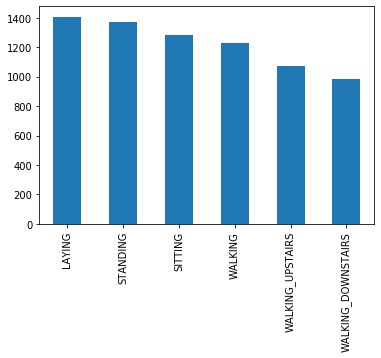

In [29]:
# Let's plot it also
df.Activity.value_counts().plot(kind = 'bar')

In [30]:
## EDA
df.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

For Laying, Standing, Sitting: Static Activites: The body movement will be very less

For Walking, Walking_upstairs, Walking_Downstaris: Dynamic Activites: The body movement is so much

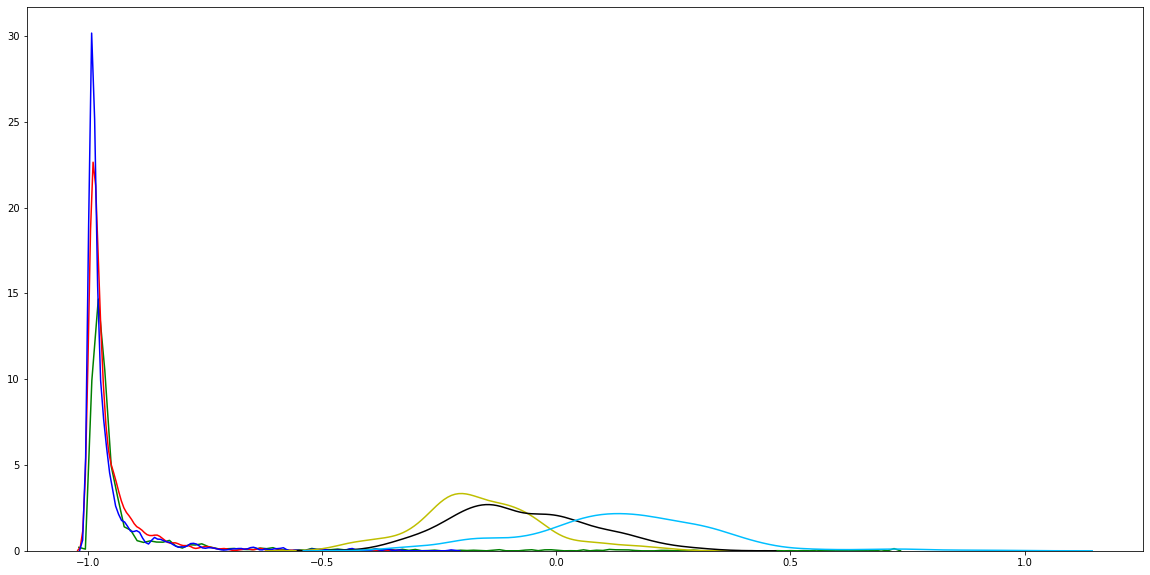

In [37]:
plt.figure(figsize=(20,10))
d1 =df.loc[df['Activity']=="LAYING"]
d2 =df.loc[df['Activity']=="STANDING"]
d3 =df.loc[df['Activity']=="SITTING"]
d4 =df.loc[df['Activity']=="WALKING"]
d5 =df.loc[df['Activity']=="WALKING_UPSTAIRS"]
d6 =df.loc[df['Activity']=="WALKING_DOWNSTAIRS"]

sns.distplot(d1[['tBodyAccMag-mean()']], hist = False, color = "g")
sns.distplot(d2[['tBodyAccMag-mean()']], hist = False, color = "r")
sns.distplot(d3[['tBodyAccMag-mean()']], hist = False, color = "b")
sns.distplot(d4[['tBodyAccMag-mean()']], hist = False, color = "y")
sns.distplot(d5[['tBodyAccMag-mean()']], hist = False, color = "black")
sns.distplot(d6[['tBodyAccMag-mean()']], hist = False, color = "deepskyblue")

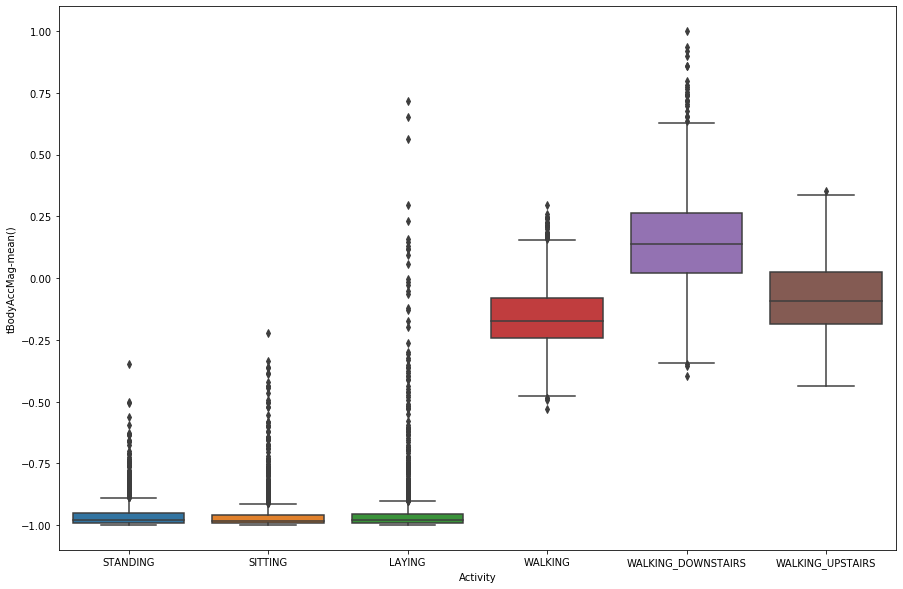

In [41]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "Activity", y = "tBodyAccMag-mean()", data = df)

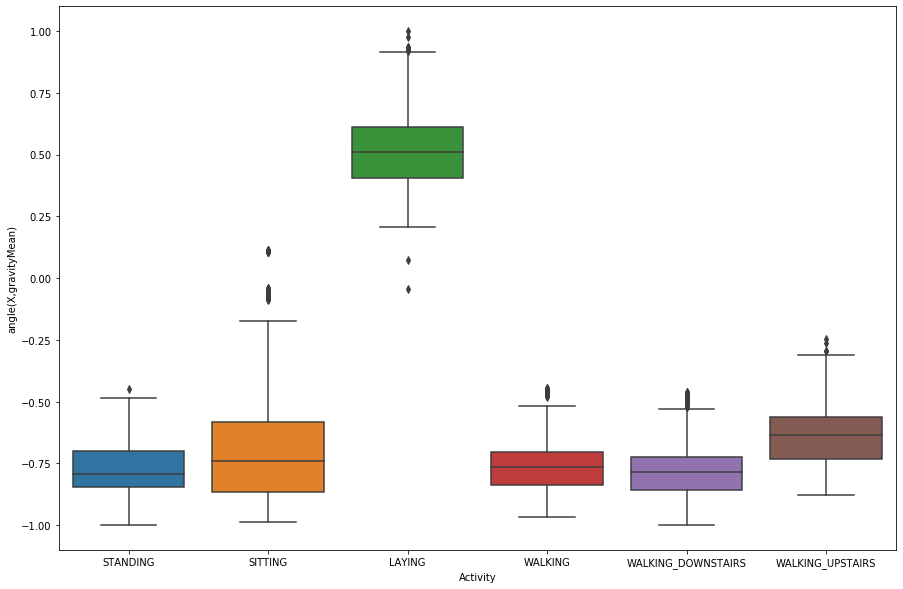

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "Activity", y = "angle(X,gravityMean)", data = df)

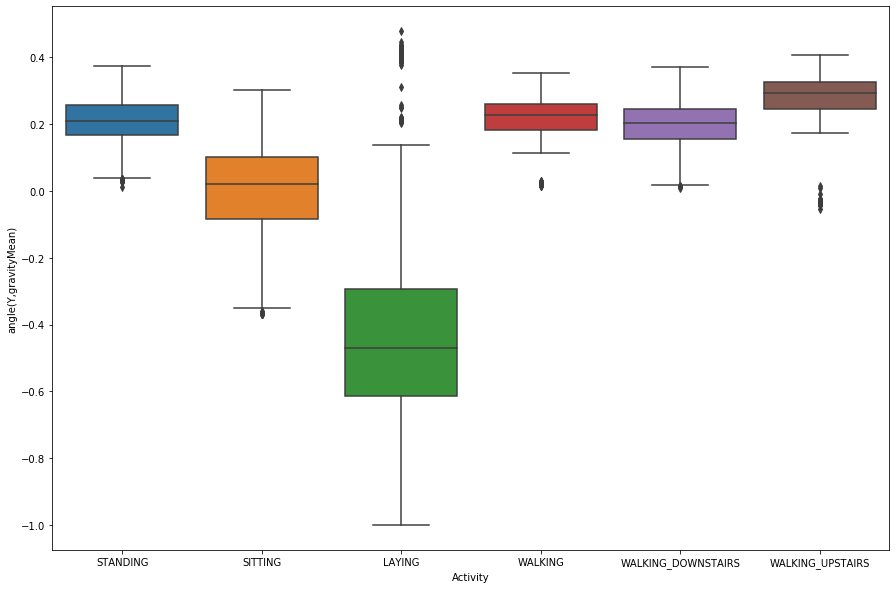

In [43]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "Activity", y = "angle(Y,gravityMean)", data = df)

In [0]:
## Pre=process the data

X = df.drop(['subject', 'Activity'], axis =1)
y = df.Activity

In [0]:
## Train - Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [46]:
## Use Standard Scaler to scale the values
## Question-4: What is the minimum value of the x_train array?
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.min()

-17.440432802691102

In [52]:
## Logistic Regression
## Data is linear or non-linearly sepreable?
## Basic Model--- Complex model-- Check the performance
## LR --70%
## LR + PENALTY ==71%
## SVM --LINEAR--75%
## SVM --C-- 77%
## SVM --RBF --88%
## SVM --C ---GAMMA--95%
## Question-5: Apply Logistic Regression with default parameters, what is the accuracy of the model on test data?
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.9868540344514959
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       419
           SITTING       0.97      0.96      0.96       386
          STANDING       0.96      0.97      0.97       410
           WALKING       1.00      1.00      1.00       356
WALKING_DOWNSTAIRS       1.00      1.00      1.00       316
  WALKING_UPSTAIRS       1.00      1.00      1.00       319

          accuracy                           0.99      2206
         macro avg       0.99      0.99      0.99      2206
      weighted avg       0.99      0.99      0.99      2206

[[419   0   0   0   0   0]
 [  0 370  15   0   0   1]
 [  0  12 398   0   0   0]
 [  0   0   0 356   0   0]
 [  0   0   0   0 316   0]
 [  0   0   0   0   1 318]]


In [53]:
## What is the accuracy of the model on the test data? Linear SVM
from sklearn import svm
svm_linear = svm.SVC(kernel = 'linear')
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.9832275611967362
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       419
           SITTING       0.96      0.95      0.96       386
          STANDING       0.96      0.96      0.96       410
           WALKING       1.00      1.00      1.00       356
WALKING_DOWNSTAIRS       0.99      1.00      1.00       316
  WALKING_UPSTAIRS       0.99      0.99      0.99       319

          accuracy                           0.98      2206
         macro avg       0.98      0.98      0.98      2206
      weighted avg       0.98      0.98      0.98      2206

[[419   0   0   0   0   0]
 [  0 368  17   0   0   1]
 [  0  16 394   0   0   0]
 [  0   0   0 356   0   0]
 [  0   0   0   0 315   1]
 [  0   0   0   0   2 317]]


In [54]:
# Question-8: What is the accuracy of the model using RBF kernel?
from sklearn import svm
svm_linear = svm.SVC(kernel = 'rbf')
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.9759746146872167
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       419
           SITTING       0.94      0.93      0.93       386
          STANDING       0.94      0.95      0.94       410
           WALKING       1.00      1.00      1.00       356
WALKING_DOWNSTAIRS       0.99      1.00      1.00       316
  WALKING_UPSTAIRS       1.00      1.00      1.00       319

          accuracy                           0.98      2206
         macro avg       0.98      0.98      0.98      2206
      weighted avg       0.98      0.98      0.98      2206

[[417   0   0   0   2   0]
 [  1 358  26   0   0   1]
 [  0  22 388   0   0   0]
 [  0   0   0 355   1   0]
 [  0   0   0   0 316   0]
 [  0   0   0   0   0 319]]


In [55]:
np.arange(0,1,0.1)[]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [58]:
## Tune C for Linear SVM
from sklearn.model_selection import GridSearchCV
param = {'C': list(np.arange(0,1,0.1))[1:]}
svm_linear_grid = svm.SVC(kernel = "linear")
clf = GridSearchCV(svm_linear_grid, param_grid = param, scoring = "accuracy")
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8,
                               0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [59]:
print(clf.best_score_)
print(clf.best_params_)

0.9819272174889374
{'C': 0.1}


In [65]:
from sklearn import svm
svm_linear = svm.SVC(kernel = 'linear', C = 0.1, class_weight='balanced')
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.9868540344514959
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       419
           SITTING       0.97      0.96      0.97       386
          STANDING       0.97      0.97      0.97       410
           WALKING       1.00      1.00      1.00       356
WALKING_DOWNSTAIRS       0.99      1.00      1.00       316
  WALKING_UPSTAIRS       0.99      0.99      0.99       319

          accuracy                           0.99      2206
         macro avg       0.99      0.99      0.99      2206
      weighted avg       0.99      0.99      0.99      2206

[[419   0   0   0   0   0]
 [  0 372  13   0   0   1]
 [  0  12 398   0   0   0]
 [  0   0   0 356   0   0]
 [  0   0   0   0 315   1]
 [  0   0   0   0   2 317]]


In [63]:
from sklearn import svm
svm_linear = svm.SVC(kernel = 'linear')
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

0.9832275611967362
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       419
           SITTING       0.96      0.95      0.96       386
          STANDING       0.96      0.96      0.96       410
           WALKING       1.00      1.00      1.00       356
WALKING_DOWNSTAIRS       0.99      1.00      1.00       316
  WALKING_UPSTAIRS       0.99      0.99      0.99       319

          accuracy                           0.98      2206
         macro avg       0.98      0.98      0.98      2206
      weighted avg       0.98      0.98      0.98      2206

[[419   0   0   0   0   0]
 [  0 368  17   0   0   1]
 [  0  16 394   0   0   0]
 [  0   0   0 356   0   0]
 [  0   0   0   0 315   1]
 [  0   0   0   0   2 317]]
